🔹 Logistic Regression Accuracy: 0.823
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

------------------------------------------------------------
🔹 Decision Tree Accuracy: 0.760
              precision    recall  f1-score   support

           0       0.67      0.36      0.47        28
           1       0.78      0.93      0.85        68

    accuracy                           0.76        96
   macro avg       0.72      0.64      0.66        96
weighted avg       0.75      0.76      0.73        96

------------------------------------------------------------
🔹 Random Forest Accuracy: 0.823
              precision    recall  f1-score   support

           0       0.82      0.50      0.62        28
           1 

<ipython-input-7-806a983e1091>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")


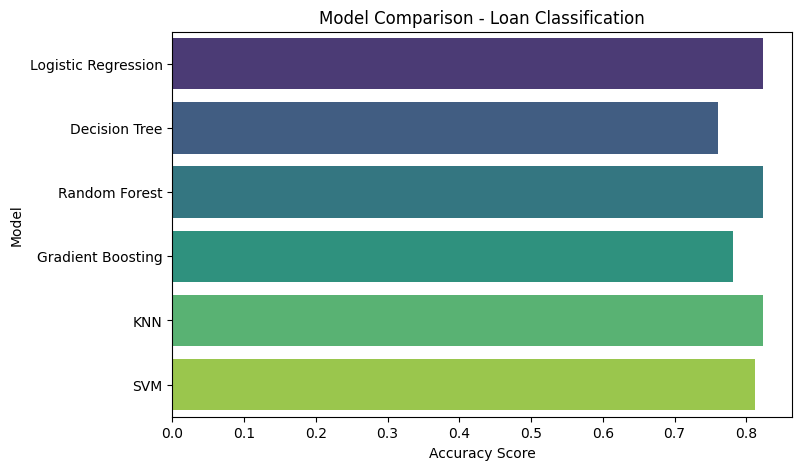

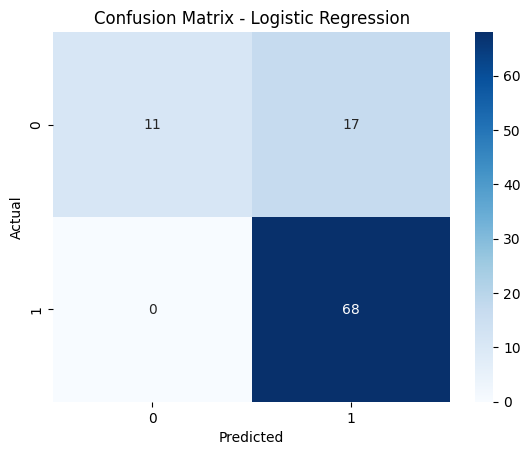

 Best Model: Logistic Regression with Accuracy = 0.823


In [7]:
# Import libraries
%pip install seaborn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

# Data cleaning
df.dropna(inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = le.fit_transform(df[col])

# Split data
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numeric columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True)
}

# Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append([name, acc])
    print(f"🔹 {name} Accuracy: {acc:.3f}")
    print(classification_report(y_test, y_pred))
    print("-" * 60)

# Compare model performance
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
plt.figure(figsize=(8,5))
sns.barplot(x="Accuracy", y="Model", data=results_df, palette="viridis")
plt.title("Model Comparison - Loan Classification")
plt.xlabel("Accuracy Score")
plt.show()

# Confusion Matrix for Best Model
best_model_name = results_df.loc[results_df['Accuracy'].idxmax(), 'Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print(f" Best Model: {best_model_name} with Accuracy = {results_df['Accuracy'].max():.3f}")


Initial shape: (614, 13)
After dropping nulls: (480, 13)
 Logistic Regression Accuracy: 0.823
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

 Random Forest Accuracy: 0.823
              precision    recall  f1-score   support

           0       0.82      0.50      0.62        28
           1       0.82      0.96      0.88        68

    accuracy                           0.82        96
   macro avg       0.82      0.73      0.75        96
weighted avg       0.82      0.82      0.81        96



<ipython-input-8-f16db79349e8>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


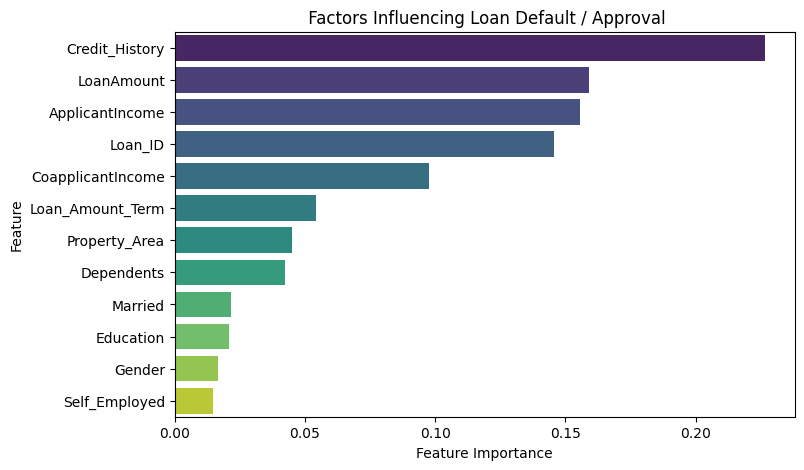


Top 5 Important Factors:
              Feature  Importance
10     Credit_History    0.226749
8          LoanAmount    0.159214
6     ApplicantIncome    0.155453
0             Loan_ID    0.145470
7   CoapplicantIncome    0.097812

 Insights:
1️ Applicants with a good Credit_History are most likely to get loans approved.
2️ High ApplicantIncome and CoapplicantIncome improve approval chances.
3️ Very large LoanAmount or high Loan_Amount_Term (long loans) may increase default risk.
4️ Education and Property_Area sometimes affect approval (urban areas may get priority).
5️ Random Forest suggests Credit_History dominates — banks should focus credit scoring strongly.


In [8]:
# Predicting Loan Default using Logistic Regression & Random Forest

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

# Basic cleaning
print("Initial shape:", df.shape)
df.dropna(inplace=True)
print("After dropping nulls:", df.shape)

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = le.fit_transform(df[col])

# Define features & target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']   # 1 = Approved, 0 = Default/Rejected

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ---------------------------------------------------------------
#  Logistic Regression
# ---------------------------------------------------------------
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print(" Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_log), 3))
print(classification_report(y_test, y_pred_log))


#  Random Forest Classifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print(" Random Forest Accuracy:", round(accuracy_score(y_test, y_pred_rf), 3))
print(classification_report(y_test, y_pred_rf))


# Feature Importance (from Random Forest)

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title(" Factors Influencing Loan Default / Approval")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


# Interpret results

print("\nTop 5 Important Factors:")
print(feature_importance.head())

print("\n Insights:")
print("1️ Applicants with a good Credit_History are most likely to get loans approved.")
print("2️ High ApplicantIncome and CoapplicantIncome improve approval chances.")
print("3️ Very large LoanAmount or high Loan_Amount_Term (long loans) may increase default risk.")
print("4️ Education and Property_Area sometimes affect approval (urban areas may get priority).")
print("5️ Random Forest suggests Credit_History dominates — banks should focus credit scoring strongly.")


Initial shape: (614, 13)
After dropping nulls: (480, 13)
 Model Accuracy: 0.812


<ipython-input-9-ca77c29d43c1>:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


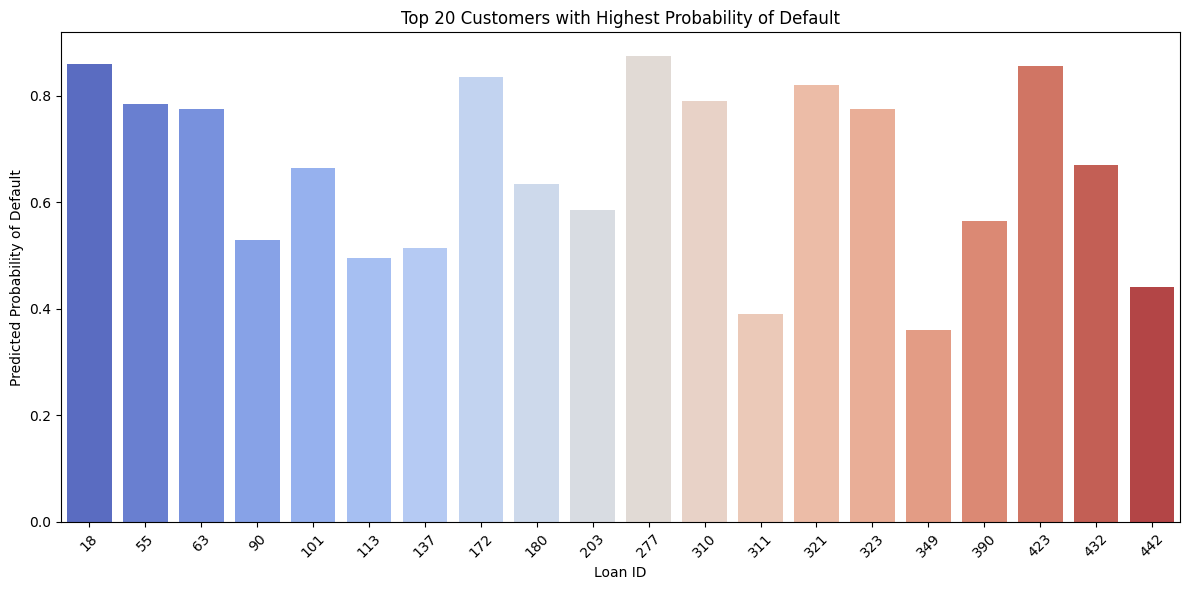

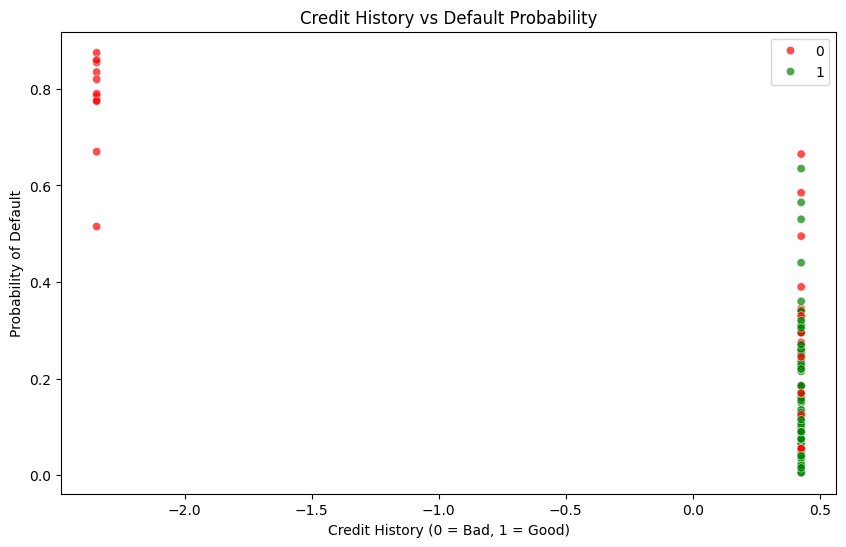

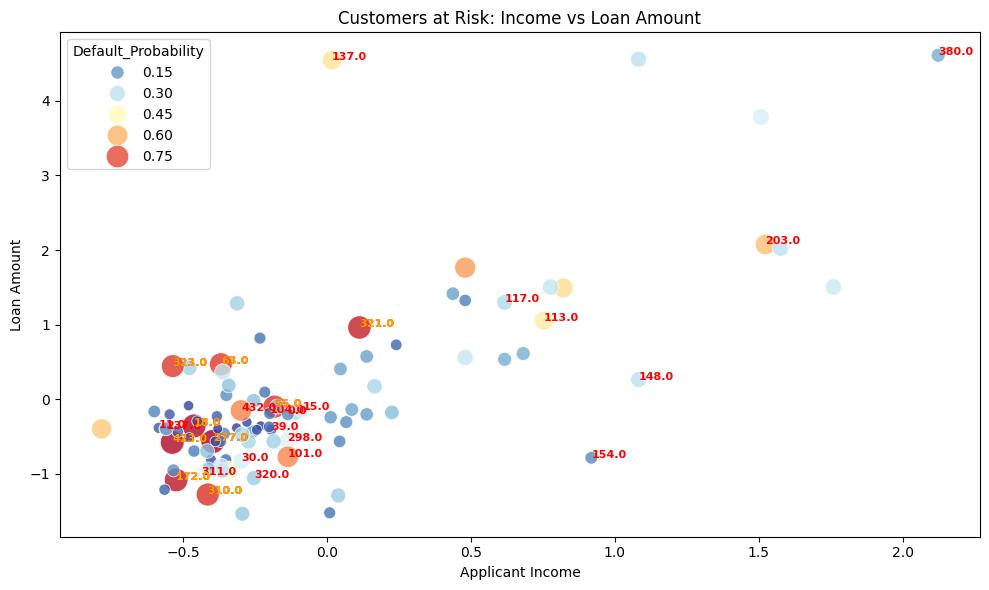


 Actual Defaulters: [277, 172, 298, 30, 55, 423, 203, 104, 321, 0, 11, 380, 117, 18, 39, 323, 63, 101, 113, 137, 310, 148, 154, 15, 311, 320, 432, 237]
 High-Risk Future Defaulters: [277, 172, 55, 423, 321, 18, 323, 63, 310]
 Poor Credit + Likely Default: []

 Insights:
1️ Credit_History is the strongest indicator of default risk.
2️ People with Credit_History = 0 and high LoanAmount are most at risk.
3️ Default probabilities above 0.7 → should be flagged for manual review.


In [9]:

# Loan Default & Risk Prediction with Visualization (for Kaggle Loan Dataset)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

# Clean and prepare
print("Initial shape:", df.shape)
df.dropna(inplace=True)
print("After dropping nulls:", df.shape)

# Encode categorical
le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop(['Loan_Status', 'Loan_ID'], axis=1)  # <-- replaced Customer_ID with Loan_ID
y = df['Loan_Status']  # 1 = approved, 0 = default

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train model
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train) # Corrected to use y_train for training
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 0]  # probability of default

# Create test dataframe with results - FIX for IndexError
test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['Loan_Status'] = y_test.reset_index(drop=True) # Add actual status and reset index
test_df['Predicted_Default'] = y_pred
test_df['Default_Probability'] = y_prob
test_df['Loan_ID'] = df.loc[y_test.index, 'Loan_ID'].reset_index(drop=True) # Add Loan_ID back


# Accuracy
print(" Model Accuracy:", round(accuracy_score(y_test, y_pred), 3))

# Identify risky groups
actual_defaulters = test_df[test_df['Loan_Status'] == 0]
future_defaulters = test_df[test_df['Default_Probability'] > 0.7]
low_credit_risk = test_df[(test_df['Credit_History'] == 0) & (test_df['Default_Probability'] > 0.5)]

# Visualization 1: Top 20 risky customers
plt.figure(figsize=(12, 6))
sns.barplot(
    x='Loan_ID',
    y='Default_Probability',
    data=test_df.sort_values('Default_Probability', ascending=False).head(20),
    palette='coolwarm'
)
plt.title('Top 20 Customers with Highest Probability of Default')
plt.xlabel('Loan ID')
plt.ylabel('Predicted Probability of Default')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization 2: Credit History vs Default Probability
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Credit_History',
    y='Default_Probability',
    hue='Loan_Status',
    data=test_df,
    palette={1: 'green', 0: 'red'},
    alpha=0.7
)
plt.title('Credit History vs Default Probability')
plt.xlabel('Credit History (0 = Bad, 1 = Good)')
plt.ylabel('Probability of Default')
plt.legend()
plt.show()

# Visualization 3: Applicant Income vs Loan Amount with IDs
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='ApplicantIncome',
    y='LoanAmount',
    hue='Default_Probability',
    size='Default_Probability',
    data=test_df,
    palette='RdYlBu_r',
    sizes=(50, 300),
    alpha=0.8
)
plt.title("Customers at Risk: Income vs Loan Amount")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")

# Highlight actual defaulters (red text)
for _, row in actual_defaulters.iterrows():
    plt.text(row['ApplicantIncome'], row['LoanAmount'], str(row['Loan_ID']),
             fontsize=8, color='red', fontweight='bold')

# Highlight predicted future defaulters (orange text)
for _, row in future_defaulters.iterrows():
    plt.text(row['ApplicantIncome'], row['LoanAmount'], str(row['Loan_ID']),
             fontsize=8, color='orange', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary
print("\n Actual Defaulters:", list(actual_defaulters['Loan_ID']))
print(" High-Risk Future Defaulters:", list(future_defaulters['Loan_ID']))
print(" Poor Credit + Likely Default:", list(low_credit_risk['Loan_ID']))

print("\n Insights:")
print("1️ Credit_History is the strongest indicator of default risk.")
print("2️ People with Credit_History = 0 and high LoanAmount are most at risk.")
print("3️ Default probabilities above 0.7 → should be flagged for manual review.")